In [861]:
print(__doc__)

Automatically created module for IPython interactive environment


In [862]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from skimage import measure
from skimage import io
from skimage.transform import resize
from skimage.filters import inverse


In [863]:
percentage_treshold = 0.02 # Min percentage of the symbol size compared to canvas size

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

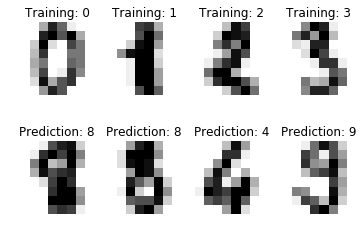

In [864]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Classify new instance

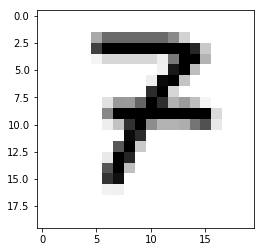

In [865]:
# Load New image in wrong size

number_7 = io.imread('images/7.png')[:, :, 0]
number_7 = np.invert(number_7)

plt.imshow(number_7, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [866]:
# Crop an array given x_0 and y_0 with an with and height
def crop_image(image, y_min, height, x_min, width):
    y_min = int(y_min)
    height = int(height)
    x_min = int(x_min)
    width = int(width)
    
    return image[y_min:y_min+height , x_min:x_min+width,]

# Find smallest square box surrounding a number

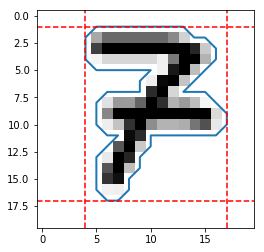

y_0: 1.0, x_0: 4.0, height: 16.0, width: 13.0


In [867]:
# Remove whitspace around a number
contours_7 = measure.find_contours(number_7, 0)

# Get extreme values of the contours
y_min, x_min = np.min(contours_7, axis=1)[0]
y_max, x_max = np.max(contours_7, axis=1)[0]

# Compute the width and height a the box surrounding the countrous
width = x_max - x_min
height = y_max - y_min

for n, contour in enumerate(contours_7):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.imshow(number_7, cmap=plt.cm.gray_r, interpolation='nearest')
    
    plt.axvline(x=x_min, color='r', linestyle='--')
    plt.axvline(x=x_min + width, color='r', linestyle='--')
    plt.axhline(y=y_min + height, color='r', linestyle='--')
    plt.axhline(y=y_min, color='r', linestyle='--')
    
plt.show()
print('y_0: {0}, x_0: {1}, height: {2}, width: {3}'.format(y_min, x_min, height, width))

# Add rows or columns to make a square image

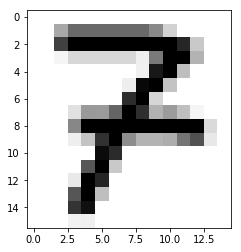

In [868]:
corpped_7 = crop_image(number_7, y_min, height, x_min, width)

# Prepend and append white vertical white lines on each side to make it a square
if(height > width):
    ny,nx = corpped_7.shape
    
    # Divide the differences between height and width by 2 since there are two lines added each iteration
    for x in range(0, int((height-width)/2)):
        
        # Add two lines, one on each side
        corpped_7 = np.c_[np.zeros(int(ny)), corpped_7, np.zeros(int(ny))]

# Prepend and append white horizontal white lines on each side to make it a square
if(width > height):
    ny,nx = corpped_7.shape
    
    # Divide the differences between height and width by 2 since there are two lines added each iteration
    for x in range(0, int((width-height)/2)):
        # Add two lines, one on each side
        corpped_7 = np.append(np.zeros([1, int(nx)]), corpped_7, axis=0)
        corpped_7 = np.append(corpped_7, np.zeros([1, int(nx)]), axis=0)

plt.imshow(corpped_7,cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


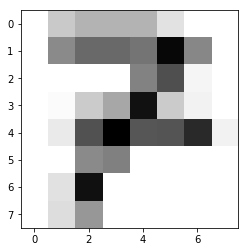

Number classified: [1]


In [869]:
final_7 = resize(corpped_7, output_shape=(8, 8), clip=False)
plt.imshow(final_7, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('Number classified: {0}'.format(classifier.predict(np.array(final_7).flatten().reshape(1, -1))))

## Classify multiple numbers in one image

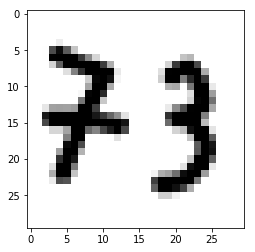

In [870]:
# Load New image in wrong size

number_73 = io.imread('images/73.png')[:, :, 0]
number_73 = np.invert(number_73)

plt.imshow(number_73, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

Number of contours found: 2


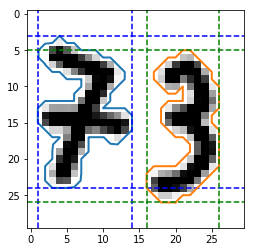

In [871]:
# Remove whitspace around a number
contours_73 = measure.find_contours(number_73, 0.10)
color = ['r', 'b', 'g', ]
color = list(mcolors.BASE_COLORS.values())

crop_list = []
for n, contour in enumerate(contours_73):
    
    # Get extreme values of the contours
    y_min, x_min = np.min([contour], axis=1)[0]
    y_max, x_max = np.max([contour], axis=1)[0]

    # Compute the width and height a the box surrounding the countrous
    width = x_max - x_min
    height = y_max - y_min
    
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.imshow(number_73, cmap=plt.cm.gray_r, interpolation='nearest')
    
    plt.axvline(x=x_min, color=color[n], linestyle='--')
    plt.axvline(x=x_min + width, color=color[n], linestyle='--')
    plt.axhline(y=y_min + height, color=color[n], linestyle='--')
    plt.axhline(y=y_min, color=color[n], linestyle='--')
    
    crop_list.append({'y_min': y_min, 'height': height, 'x_min': x_min, 'width': width})
    
print('Number of contours found: {0}'.format(len(contours_73)))
plt.show()

Percentage of crop / entire canvas 30.32%


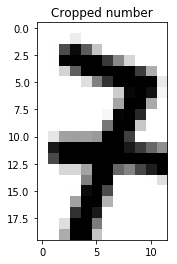

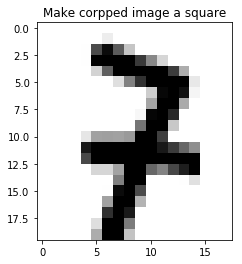

/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


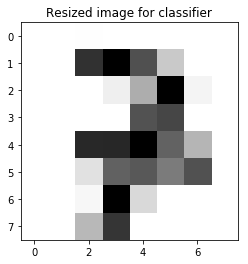

Number classified: 1
Percentage of crop / entire canvas 23.33%


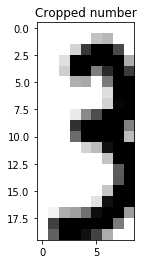

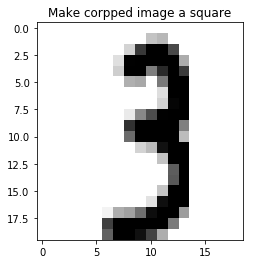

/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/davidvanrooij/.pyenv/versions/3.6.7/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


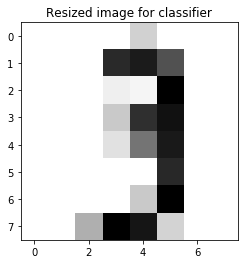

Number classified: 1


0 contours dropped


In [872]:
# Get size of the original image
original_size_y, original_size_x = number_73.shape
count_dropped = 0

for crop in crop_list:    

    # Crop image
    number_73_crop = crop_image(number_73, crop['y_min'], crop['height'], crop['x_min'], crop['width'])
    
    if((crop['height']*crop['width'])/(original_size_y*original_size_x) < percentage_treshold):
        count_dropped += 1
        continue
        
    print('Percentage of crop / entire canvas {0:.2%}'.format((crop['height']*crop['width'])/(original_size_y*original_size_x)))

    # Plot cropped image
    plt.imshow(number_73_crop,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Cropped number')
    plt.show()

    # Prepend and append white vertical white lines on each side to make it a square
    if(crop['height'] > crop['width']):
        ny,nx = number_73_crop.shape

        # Divide the differences between height and width by 2 since there are two lines added each iteration
        for x in range(0, int((crop['height']-crop['width'])/2)):

            # Add two lines, one on each side
            number_73_crop = np.c_[np.zeros(int(ny)), number_73_crop, np.zeros(int(ny))]

    # Prepend and append white horizontal white lines on each side to make it a square
    if(width > height):
        ny,nx = number_73_crop.shape

        # Divide the differences between height and width by 2 since there are two lines added each iteration
        for x in range(0, int((width-height)/2)):
            # Add two lines, one on each side
            number_73_crop = np.append(np.zeros([1, int(nx)]), number_73_crop, axis=0)
            number_73_crop = np.append(number_73_crop, np.zeros([1, int(nx)]), axis=0)
    
    # Plot cropped squared image
    plt.imshow(number_73_crop,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Make corpped image a square')
    plt.show()
    
    # Plot resized image
    number_73_crop_resize = resize(number_73_crop, output_shape=(8, 8))
    plt.imshow(number_73_crop_resize, cmap=plt.cm.gray_r)
    plt.title('Resized image for classifier')
    plt.show()
    
    # Classify resized image
    number_73_crop_resize_reshape = np.array(number_73_crop_resize).flatten().reshape(1, -1)
    print('Number classified: {0}'.format(classifier.predict(number_73_crop_resize_reshape)[0]))


print('\n\n{0} contours dropped'.format(count_dropped))

#  Try some more numbers

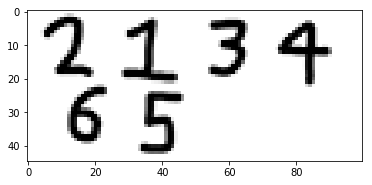

In [873]:
# Load New image in wrong size

number_73 = io.imread('images/numbers.png')[:, :, 0]
number_73 = np.invert(number_73)

plt.imshow(number_73, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

Number of contours found: 8


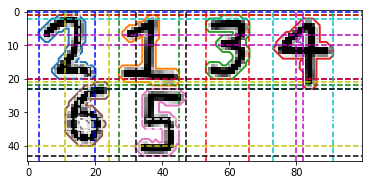

In [874]:
# Remove whitspace around a number
contours_73 = measure.find_contours(number_73, 0.10)
color = ['r', 'b', 'g', ]
color = list(mcolors.BASE_COLORS.values())

crop_list = []
for n, contour in enumerate(contours_73):
    
    # Get extreme values of the contours
    y_min, x_min = np.min([contour], axis=1)[0]
    y_max, x_max = np.max([contour], axis=1)[0]

    # Compute the width and height a the box surrounding the countrous
    width = x_max - x_min
    height = y_max - y_min
    
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.imshow(number_73, cmap=plt.cm.gray_r, interpolation='nearest')
    
    plt.axvline(x=x_min, color=color[n], linestyle='--')
    plt.axvline(x=x_min + width, color=color[n], linestyle='--')
    plt.axhline(y=y_min + height, color=color[n], linestyle='--')
    plt.axhline(y=y_min, color=color[n], linestyle='--')
    
    crop_list.append({'y_min': y_min, 'height': height, 'x_min': x_min, 'width': width})
    
print('Number of contours found: {0}'.format(len(contours_73)))
plt.show()

Percentage of crop / entire canvas 7.55%


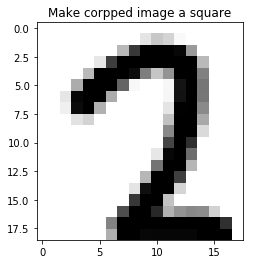

Number classified: 1
Percentage of crop / entire canvas 8.40%


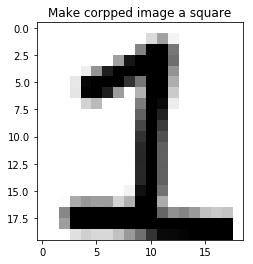

Number classified: 1
Percentage of crop / entire canvas 5.49%


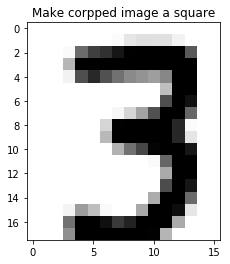

Number classified: 1
Percentage of crop / entire canvas 8.40%


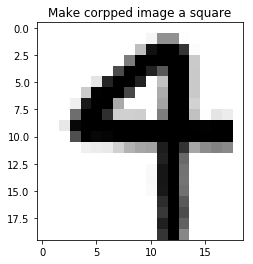

Number classified: 1
Percentage of crop / entire canvas 5.49%


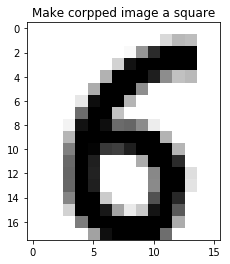

Number classified: 1
Percentage of crop / entire canvas 6.67%


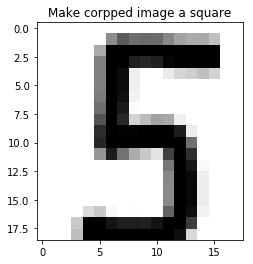

Number classified: 1


2 contours dropped


In [875]:
# Get size of the original image
original_size_y, original_size_x = number_73.shape
count_dropped = 0

for crop in crop_list:    

    # Crop image
    number_73_crop = crop_image(number_73, crop['y_min'], crop['height'], crop['x_min'], crop['width'])
    
    if((crop['height']*crop['width'])/(original_size_y*original_size_x) < percentage_treshold):
        count_dropped += 1
        continue
        
    print('Percentage of crop / entire canvas {0:.2%}'.format((crop['height']*crop['width'])/(original_size_y*original_size_x)))


    # Prepend and append white vertical white lines on each side to make it a square
    if(crop['height'] > crop['width']):
        ny,nx = number_73_crop.shape

        # Divide the differences between height and width by 2 since there are two lines added each iteration
        for x in range(0, int((crop['height']-crop['width'])/2)):

            # Add two lines, one on each side
            number_73_crop = np.c_[np.zeros(int(ny)), number_73_crop, np.zeros(int(ny))]

    # Prepend and append white horizontal white lines on each side to make it a square
    if(width > height):
        ny,nx = number_73_crop.shape

        # Divide the differences between height and width by 2 since there are two lines added each iteration
        for x in range(0, int((width-height)/2)):
            # Add two lines, one on each side
            number_73_crop = np.append(np.zeros([1, int(nx)]), number_73_crop, axis=0)
            number_73_crop = np.append(number_73_crop, np.zeros([1, int(nx)]), axis=0)
    
    # Plot cropped squared image
    plt.imshow(number_73_crop,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Make corpped image a square')
    plt.show()
    
    
    # Classify resized image
    number_73_crop_resize_reshape = np.array(number_73_crop_resize).flatten().reshape(1, -1)
    print('Number classified: {0}'.format(classifier.predict(number_73_crop_resize_reshape)[0]))

print('\n\n{0} contours dropped'.format(count_dropped))